# <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">POLYCYSTIC OVARY SYNDROME (PCOS): DIAGNOSIS</p>

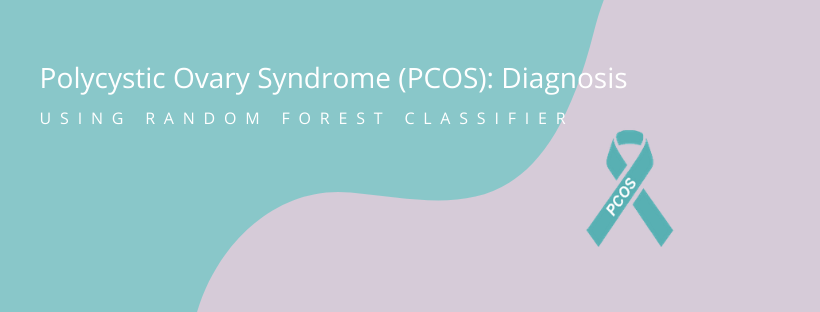

**<span style="color:teal;"> Polycystic Ovary Syndrome (PCOS) </span>** Polycystic Ovary Syndrome (PCOS) is a health problem that affects women of childbearing age. Women with PCOS have a hormonal imbalance and metabolism problems that may affect their overall health.

PCOS manifests as a variety of symptoms 

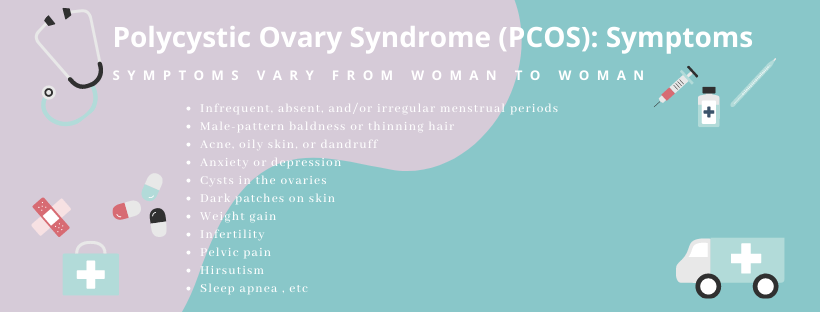

For more information on PCOS visit ([here](https://www.webmd.com/women/what-is-pcos))

In [19]:
#Install these packages in Anaconda command prompt (without '#')
#Just search "Anaconda Prompt"

#conda install -c conda-forge imbalanced-learn
#conda install -c conda-forge kaggle

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
os.environ['KAGGLE_USERNAME'] = "swabbie8"
os.environ['KAGGLE_KEY'] = "f45e6d7caf124560bbf44b340e361b7b"

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [22]:
api.dataset_download_files('prasoonkottarathil/polycystic-ovary-syndrome-pcos', path="../dataset")

In [23]:
import zipfile
with zipfile.ZipFile('../dataset/polycystic-ovary-syndrome-pcos.zip', 'r') as zip_ref:
    zip_ref.extractall('../dataset')

# <p style="background-color:teal;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Table Of Contents</p>

* **Importing Library**
* **Loading data**
* **Data Preprocessing**
* **Data Visualization**
* **Model Building**
  

# <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>


In [24]:
#Importing all the libraries that I use in this project
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Loading Data</p>
 
 **About the data:**

* This dataset contains all physical and clinical parameters to determine PCOS and infertility related issues. There are a total of 44 parameters. 

* This data is collected from 10 different hospitals across Kerala, India.

* The unit used is feet to cm

* Blood pressure entered as systolic and diastolic separately

* RBS means Random glucose test

* Beta-HCG cases are mentioned as Case I and II

* Blood Group indications: A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18


In [25]:
#Loding data into the kernels 

file_path_with_infertility="../dataset/PCOS_infertility.csv"
file_path_without_infertility="../dataset/PCOS_data_without_infertility.xlsx"

PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")

In [26]:
PCOS_inf.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [27]:
PCOS_woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Data Preprocessing</p>

**Steps involved in Data Preprocessing:**

* Merging the two files that are sorted into two based on patients with infertility and without infertility

* Dropping the repeated features
 
* Encoding categorical variables (dtype objects)

* Dealing with missing values 


**<span style="color:teal;"> Merging the two files as per patient file no. and dropping the repeated features</span>**

In [28]:
#Merging the two files as per patient file no. 
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

#Taking a look at the dataset
data.head() 

C:\Users\krisJ\AppData\Local\Temp\ipykernel_8228\958694530.py:3: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


Everything looks alright we can work with this.

We have a dataset of shape 5 rows × 44 columns.

Let's head up to the next step and have a further look at the data.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

**<span style="color:teal;"> Encoding categorical variables (dtype objects)</span>**

In [30]:
#Having a look at the data with dtype objects

data["AMH(ng/mL)"].head() 

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [31]:
#Similarly

data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

After having a look at this info we may conclude that:

* Some numeric data are saved as strings.
* There are some missing values. Namely, Marriage Status (Yrs)& Fast food (Y/N)

In [32]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

#Dealing with missing values. 
#Filling NA values with the median of that feature.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

#Clearing up the extra space in the column names (optional)

data.columns = [col.strip() for col in data.columns]

 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Exploratory Data Analysis</p>


**Steps involved in EDA**
* Feature selection based on the correlation factor 
* Patterns Of Length Of The Menstrual Cycle
* Patterns Of BMI 
* Patterns Of Irregularity In Mensuration 
* Number of Follicles
* Some Miscellaneous EDA


**<span style="color:teal;"> Let's explore features </span>**

In [33]:
# Having a look at some basic statistical details.

data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [34]:
#Added in the recent update. 
#This came upon evaluating the dataset some obvious outliers I am not explaining the process I used. 
#Dropping the outliers. 

data = data[(data["BP _Diastolic (mmHg)"]>20)]
data = data[(data["AMH(ng/mL)"]<40)]
data = data[(data["BP _Systolic (mmHg)"]>20)]
data = data[(data["Endometrium (mm)"]>0)]
data = data[(data["Avg. F size (L) (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["RBS(mg/dl)"]<200)]
data = data[(data["PRG(ng/mL)"]<20)]
data = data[(data["Pulse rate(bpm)"]>20)]
data = data[(data["FSH(mIU/mL)"]<4000)]
data = data[(data["LH(mIU/mL)"]<1500)]
data = data[(data["Cycle(R/I)"]<4.5)]

data.shape

(519, 44)

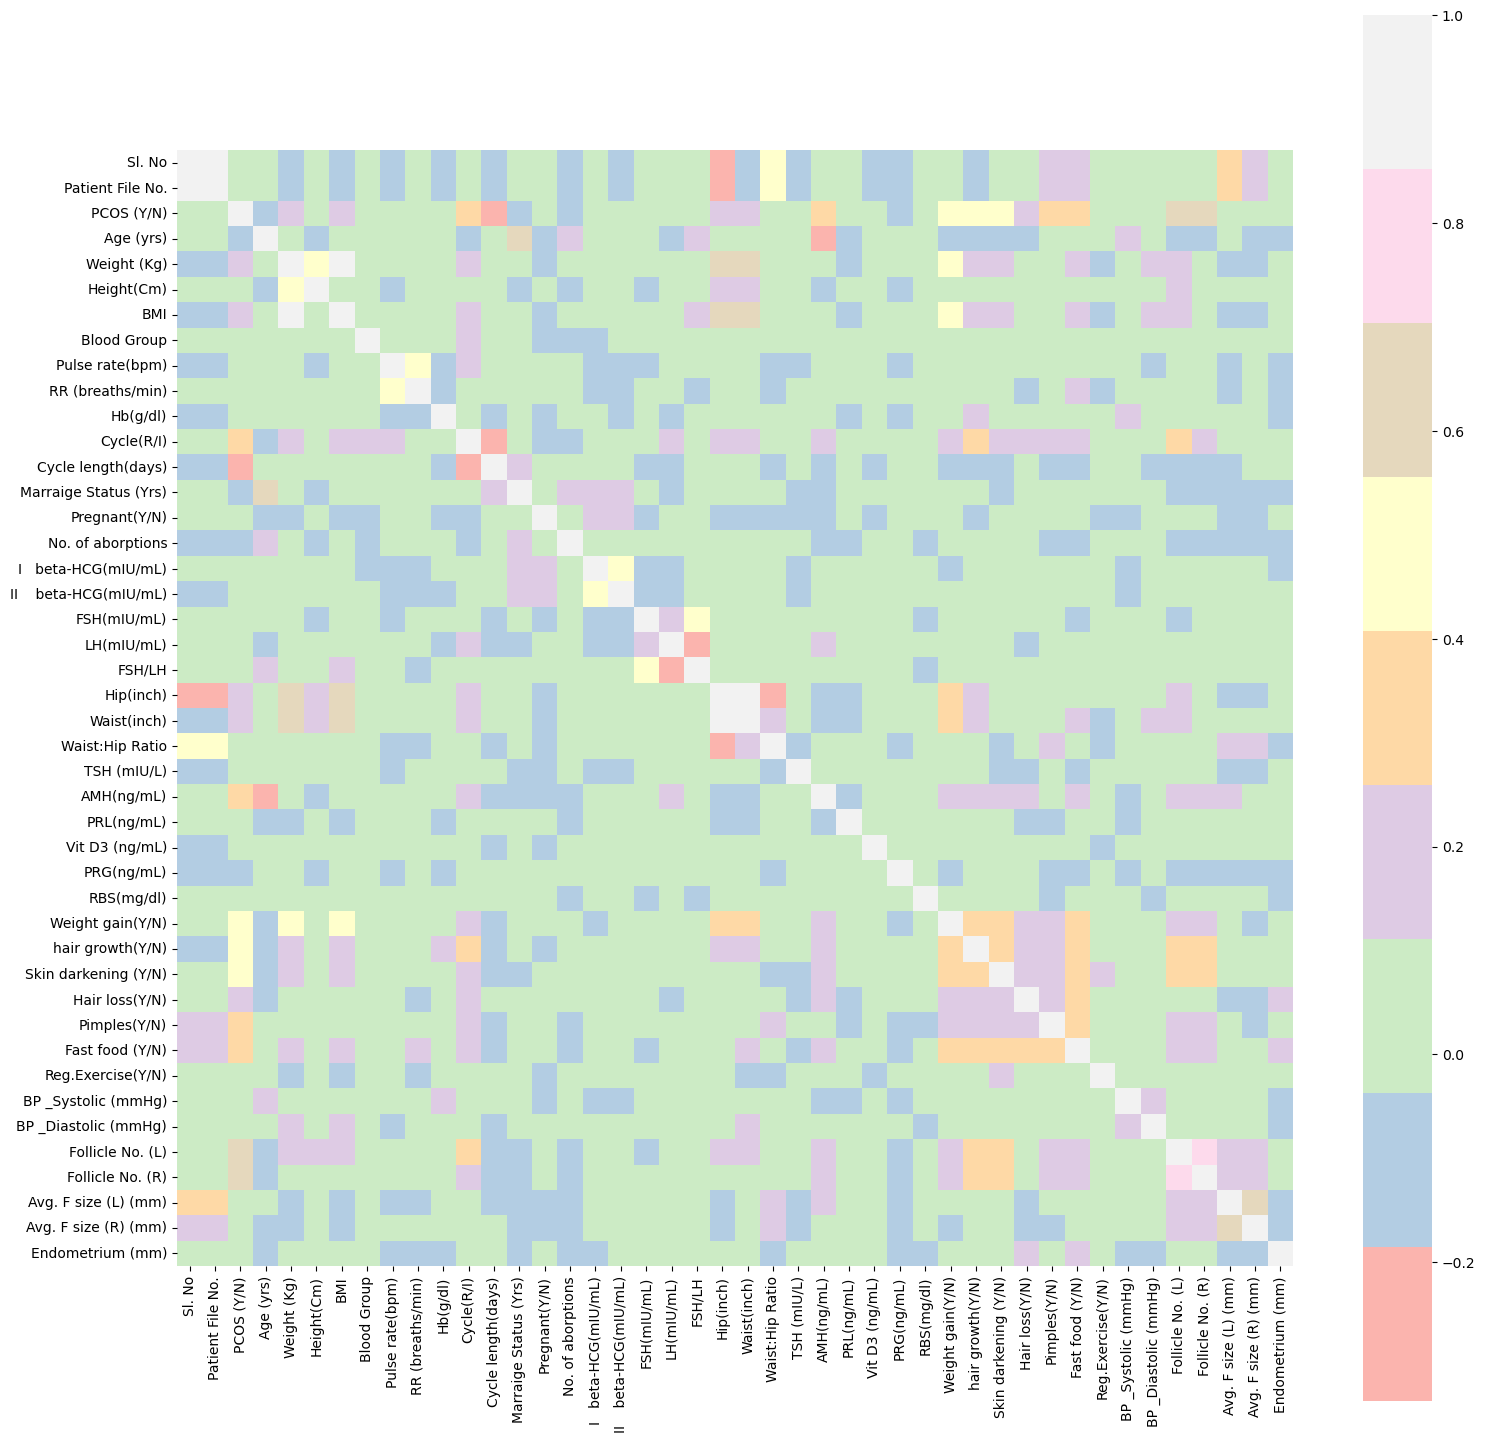

In [35]:
#Examaning a correlation matrix of all the features 

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

In [36]:
#How all the features correlate with the PCOS 

corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648587
Follicle No. (L)          0.602167
Skin darkening (Y/N)      0.471249
hair growth(Y/N)          0.460469
Weight gain(Y/N)          0.441506
Cycle(R/I)                0.404364
Fast food (Y/N)           0.376342
Pimples(Y/N)              0.288838
AMH(ng/mL)                0.259486
Weight (Kg)               0.210883
BMI                       0.193977
Hair loss(Y/N)            0.172316
Hip(inch)                 0.165005
Waist(inch)               0.159195
Pulse rate(bpm)           0.102245
Avg. F size (L) (mm)      0.098087
Hb(g/dl)                  0.094760
LH(mIU/mL)                0.093912
Vit D3 (ng/mL)            0.085608
Endometrium (mm)          0.083764
Avg. F size (R) (mm)      0.083330
Height(Cm)                0.075549
Reg.Exercise(Y/N)         0.060054
Sl. No                    0.044502
Patient File No.          0.044502
FSH/LH                    0.044133
Blood Group               0.043630
RBS(mg/dl)          

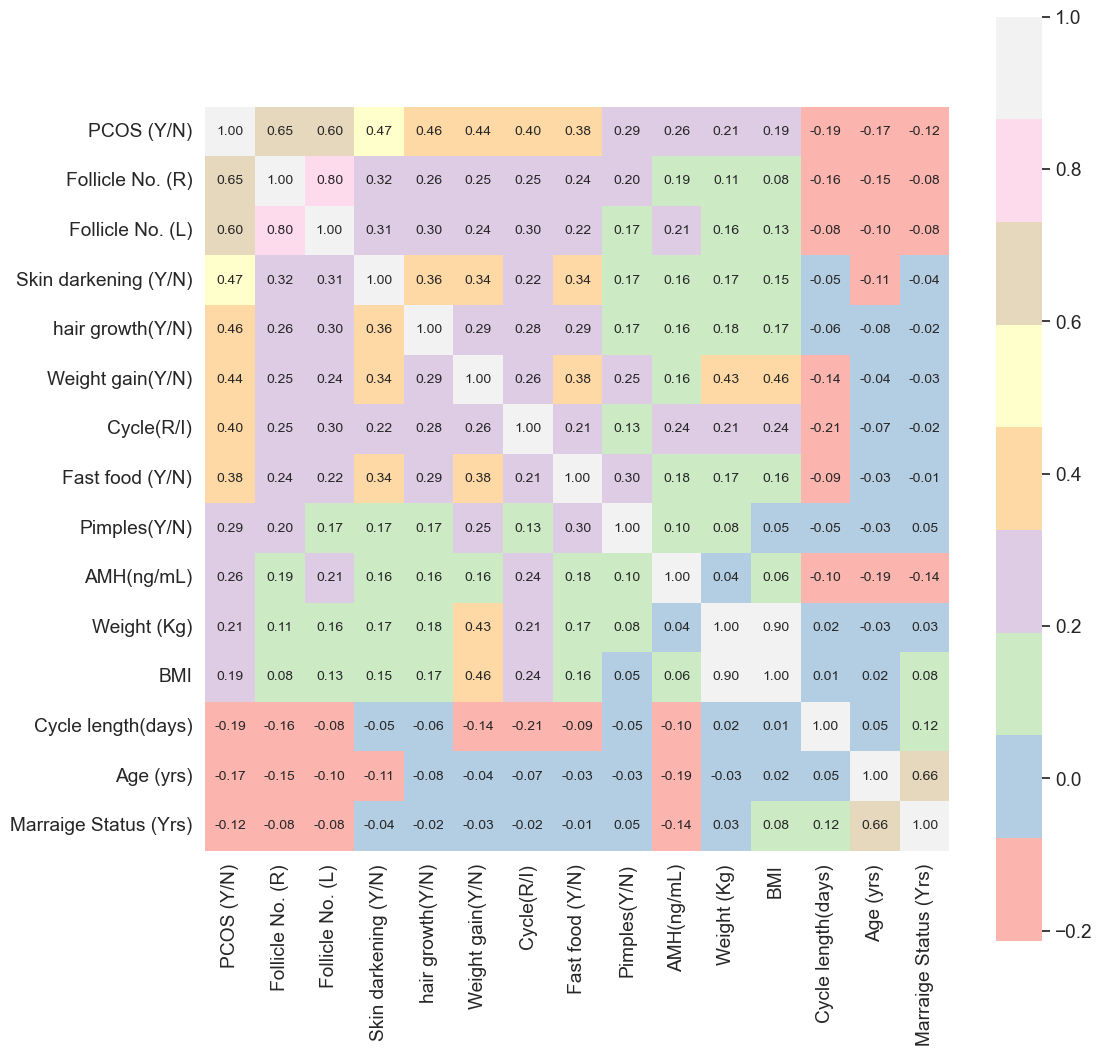

In [37]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

 **<span style="color:teal;"> Patterns Of Length Of The Menstrual Cycle </span>**

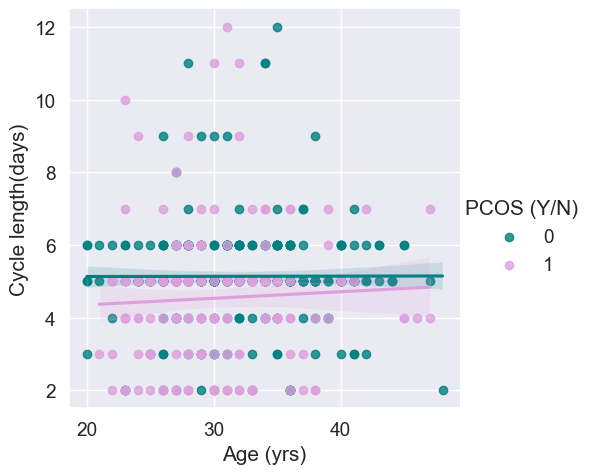

In [38]:
# Length of menstrual phase in PCOS vs normal 
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age. 

 **<span style="color:teal;"> Patterns Of BMI </span>**

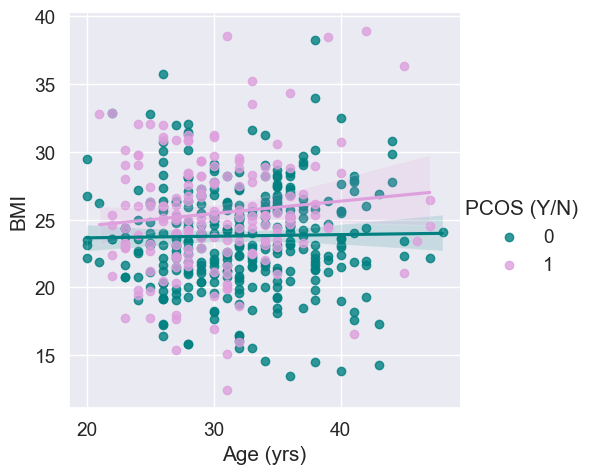

In [39]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.

 **<span style="color:teal;"> Patterns Of Irregularity In Mensuration  </span>**

*There is no clarity on what this feature and its values indicate but, *

**Apparently in the feature "Cycle(R/I)" value:**

**4** indicates irregular menstrual cycle 

**2** indicates a regular menstrual cycle

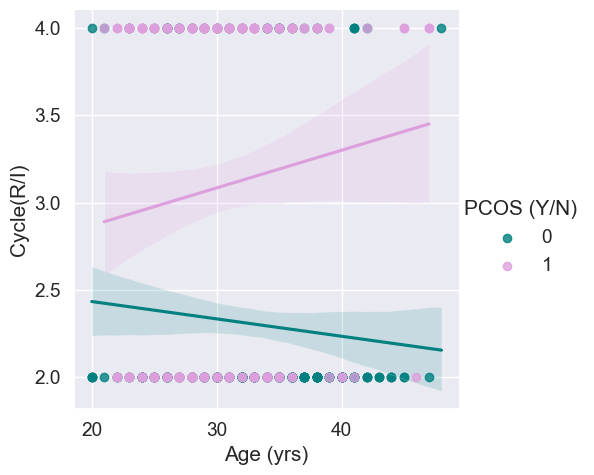

In [40]:
# cycle IR wrt age 
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.

 **<span style="color:teal;"> Number Of Follicles </span>**

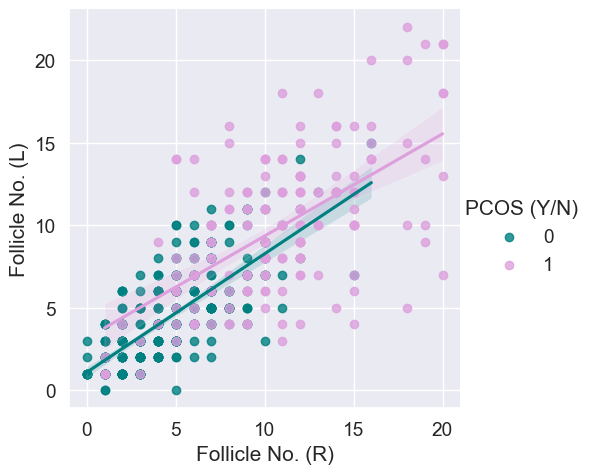

In [41]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient. 
Thia is curious let's exlore it with boxen plot. 

c:\Users\krisJ\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


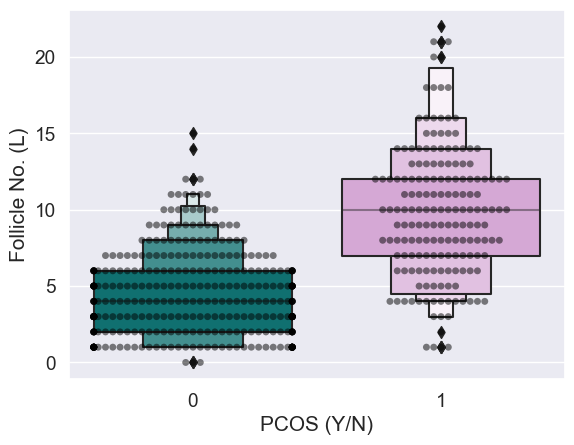

c:\Users\krisJ\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


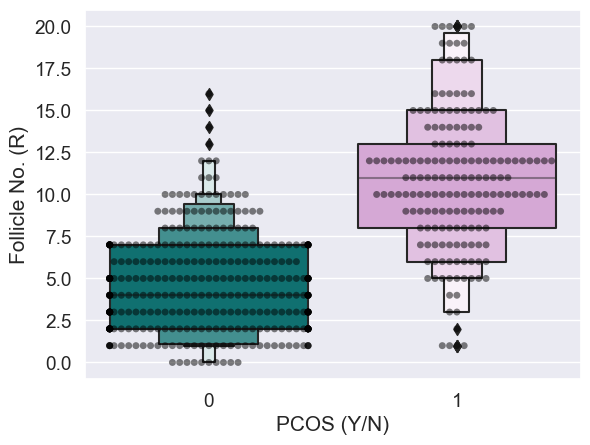

In [42]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

The number of follicles in women with PCOS is higher, as expected. And are unequal as well. 
 
**<span style="color:teal;"> Some Miscellaneous EDA </span>**

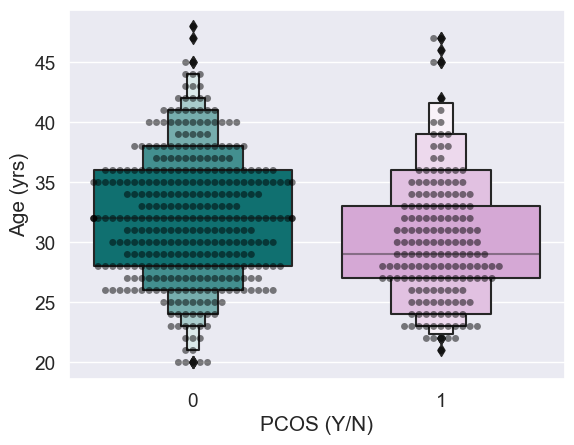

c:\Users\krisJ\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


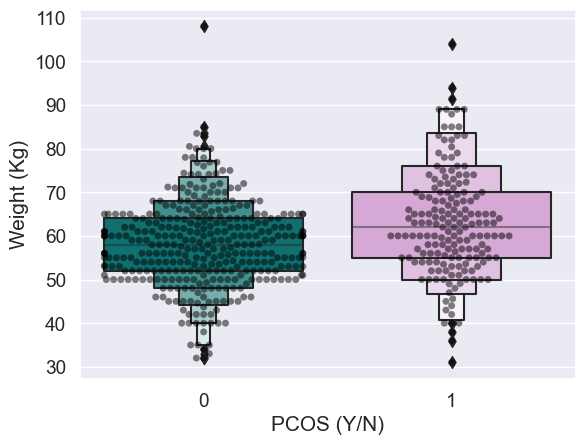

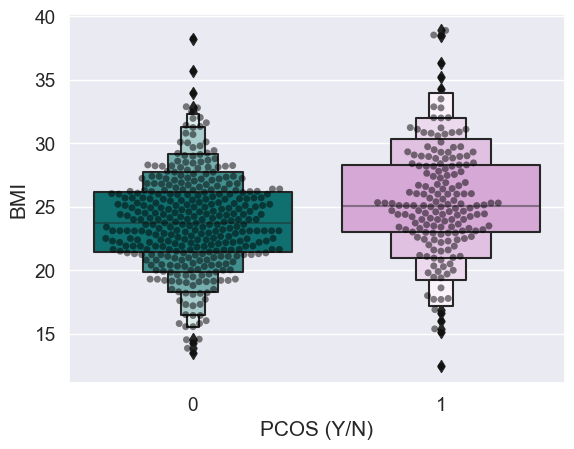

c:\Users\krisJ\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


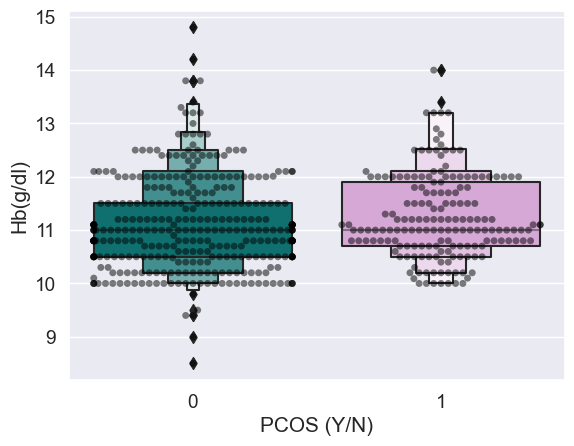

c:\Users\krisJ\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\krisJ\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


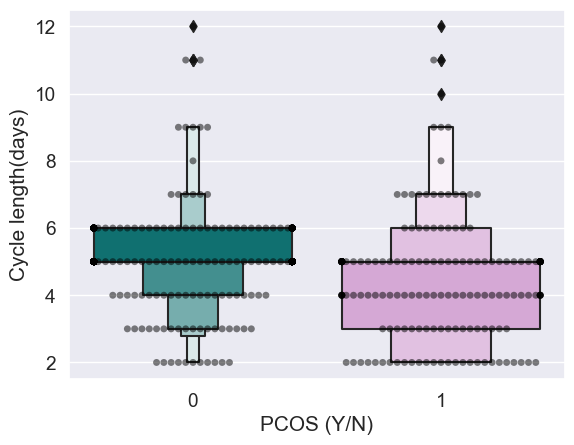

c:\Users\krisJ\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


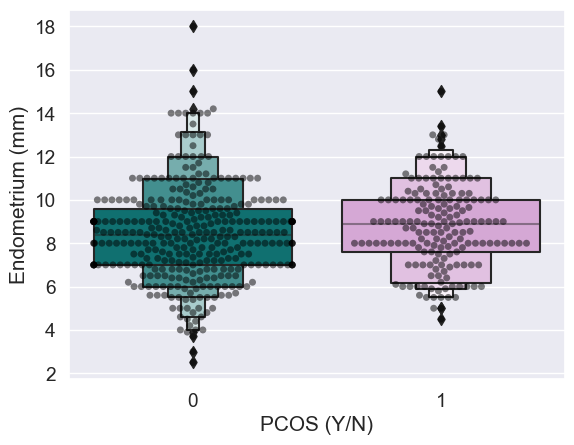

In [43]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Model Building</p>

**Steps involved in Model Building:**

* Assigning values to features as X and target as y
* Split test and training sets
* Fitting a vanilla model as the base Random Forest model
* Hyperparameter tuning using GridSearch CV
* Fitting the final model 
* Evaluating the confusion matrix
* Evaluating the classification report

In [44]:
#Assiging the features (X)and target(y)

X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) #droping out index from features too
y=data["PCOS (Y/N)"]


In [45]:
print(X.columns)

Index(['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group',
       'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')


[0.01492876 0.01427137 0.01422408 0.0147964  0.01116459 0.01274516
 0.00997871 0.0120907  0.05941718 0.0246761  0.01377712 0.00838852
 0.00644059 0.01229255 0.00980983 0.01145104 0.01286393 0.01160024
 0.01496156 0.01478849 0.01373211 0.01309049 0.02218699 0.01128622
 0.0113548  0.01229746 0.01265373 0.06300525 0.08495427 0.09192229
 0.01284093 0.03003883 0.03745331 0.0146604  0.01122055 0.0075675
 0.09386707 0.10877979 0.01659857 0.01394903 0.01187351]


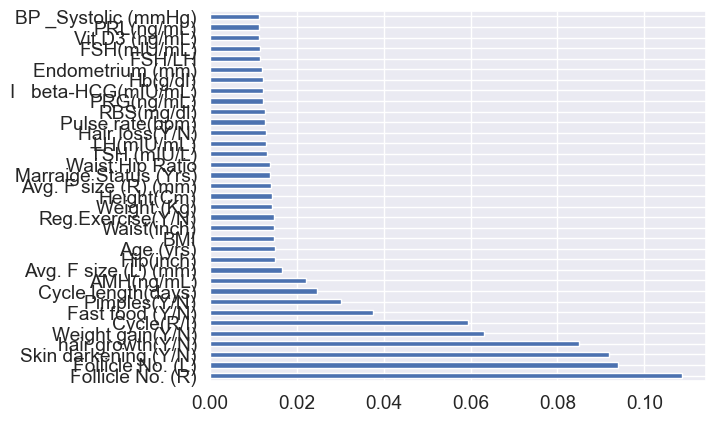

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

In [47]:
fimp = feat_importances.nlargest(15)
df_again = data[fimp.index]
df_again

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),Cycle length(days),AMH(ng/mL),Avg. F size (L) (mm),Hip(inch),Age (yrs),BMI,Waist(inch)
0,3,3,0,0,0,2,1.0,0,5,2.07,18.0,36,28,19.300000,30
1,5,3,0,0,0,2,0.0,0,5,1.53,15.0,38,36,24.921163,32
2,15,13,0,0,0,2,1.0,1,5,6.63,18.0,40,33,25.270891,36
3,2,2,0,0,0,2,0.0,0,5,1.22,15.0,42,37,29.674945,36
4,4,3,0,0,0,2,0.0,0,5,2.26,16.0,37,25,20.060954,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,1,0,0,0,2,0.0,0,5,1.70,17.5,28,35,18.500000,26
537,7,9,0,0,1,2,0.0,0,5,5.60,19.0,34,30,25.300000,32
538,0,1,0,0,0,2,0.0,0,6,3.70,18.0,30,36,23.400000,28
539,6,7,0,0,0,4,0.0,1,2,5.20,18.0,28,27,22.200000,26


In [48]:
from imblearn.over_sampling import ADASYN
from imblearn import under_sampling, over_sampling, combine

ada = over_sampling.ADASYN(sampling_strategy='minority', random_state=None, n_neighbors=3, n_jobs=None)
X_ada, y_ada = ada.fit_resample(df_again, y)

enn = under_sampling.EditedNearestNeighbours(sampling_strategy='not minority', n_neighbors=3, kind_sel='mode', n_jobs=None)
X_sm, y_sm= enn.fit_resample(X_ada, y_ada)

#sm = SMOTEN(random_state=42)

#X_sm, y_sm = sm.fit_resample(df_again, y)

X_sm=pd.DataFrame(X_sm, 
            columns=df_again.columns)
y_sm=pd.DataFrame(y_sm, columns=['PCOS (Y/N)'])


print('New balance of 1 and 0 classes (%):')
y_sm.value_counts()

New balance of 1 and 0 classes (%):


c:\Users\krisJ\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_edited_nearest_neighbours.py:140: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  nnhood_label, _ = mode(nnhood_label, axis=1)


PCOS (Y/N)
0             346
1             341
dtype: int64

In [49]:
#Splitting the data into test and training sets

X_train,X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state=12) 

 **<span style="color:teal;"> Fitting the Model </span>**
 
Fitting a rather vanilla modle as base model 

In [50]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [51]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with linear kernel and C=1.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train,y_train)



pred_rfc = linear_svc1000.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

c:\Users\krisJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8260869565217391


In [52]:
print('Training set score: {:.4f}'.format(linear_svc1000.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc1000.score(X_test, y_test)))

Training set score: 0.8652
Test set score: 0.8261


**<span style="color:teal;"> Explainable AI </span>**

**<span style="color:teal;"> Classification Report & Confusion Matrix </span>**

In [53]:
classi_report = classification_report(y_test, pred_rfc)
print(classi_report)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        62
           1       0.84      0.84      0.84        76

    accuracy                           0.83       138
   macro avg       0.82      0.82      0.82       138
weighted avg       0.83      0.83      0.83       138



<AxesSubplot:>

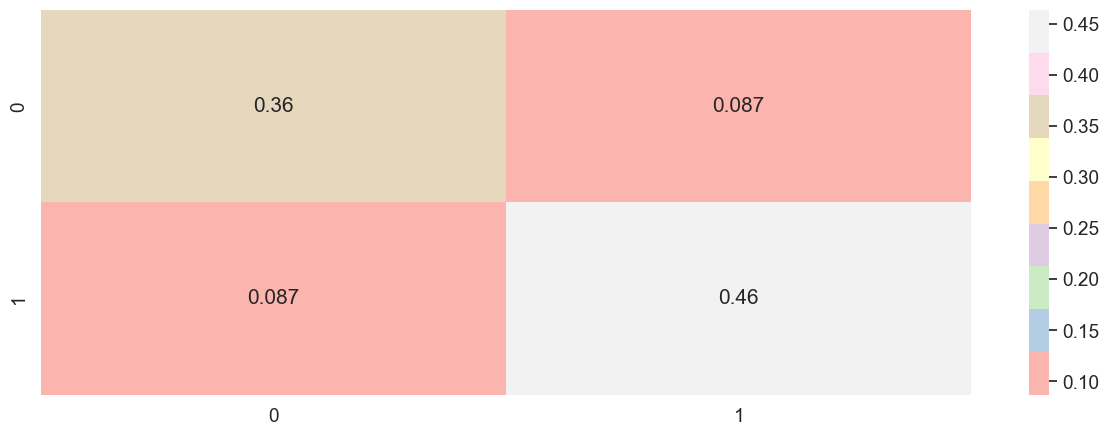

In [54]:
# cofusion matrix
plt.subplots(figsize=(15,5))
cf_matrix = confusion_matrix(y_test, pred_rfc)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')

**<span style="color:teal;"> Save Model </span>**

In [56]:
import pickle

# save
with open('../models/svm-model.pkl','wb') as f:
    pickle.dump(linear_svc1000,f)

**<span style="color:teal;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:teal;"> If you have any suggestions or questions, I am all ears!</span>**

**<span style="color:teal;">Best Wishes!</span>**

# <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">END</p>